# ***Kmeans Works Only with Circular Data***

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
X,y_true=make_blobs(n_samples=500,centers=3,cluster_std=0.60,random_state=42)

In [5]:
df=pd.DataFrame(X,columns=['Feature_1','Feature_2'])

In [7]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [8]:
sc=StandardScaler()
X_scaled=sc.fit_transform(df)

In [9]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [17]:
inertia=[]
K_range=range(1,11)


In [18]:
for k in K_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


In [19]:
inertia

[1000.0000000000001,
 297.8954141051722,
 11.575484723104982,
 9.752067977356843,
 8.25717527244628,
 6.917577320416798,
 6.334755391595288,
 5.704177177901429,
 5.060234133532076,
 4.762361898130397]

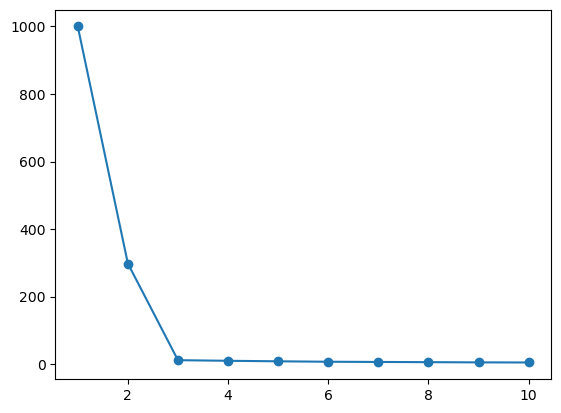

In [25]:
plt.plot(K_range,inertia,marker='o')

In [28]:
kmeans_final=KMeans(n_clusters=3,random_state=42)

In [29]:
cluster_labels=kmeans_final.fit_predict(X_scaled)

In [34]:
df['cluster']=cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

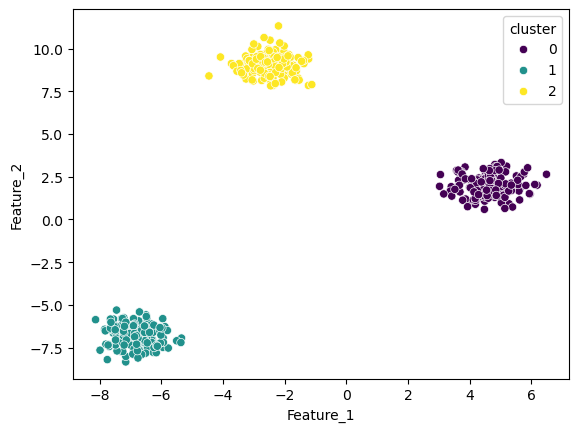

In [39]:
sns.scatterplot(x=df['Feature_1'],
            y=df['Feature_2'],
            hue=df['cluster'],
            palette='viridis'
                     )